In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


To review arrays and slicing, let's do an example.

# Diffusion using random walks
The following example has been adapted from [scipylectures.org](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).   

The random walk process is a commonly used example in physics and mathematics. 
We will model the diffussion of a particle in a one dimensional grid using a random walk. The particle starts at the origin at $t=0$ and at each time step jumps right or left with equal probability. A step towards left is denoted by a displacement of `-1` units and a step towards right is `+1` units. See below

<img src="../data/img/random_walk_1.png" height=100 width=450>

**We want to find the typical distance (in units of grid points) from the origin of a random walker after `t` left or right jumps.**

To achieve this, we will generate a random trajectory for a walker. We will also generate a lot of such walks (let's call them *stories*) and check their statistical properties to find a pattern.

The simulation will be done using NumPy array computing tricks: we are going to create a 2D array with the *stories* along one axis and *time* along another.

<img src="../data/img/random_walk_schema_1.png" height=300px width=300px>

In [2]:
n_stories = 10000 # number of stories i.e the maximum number of independent walks
t_max = 200      # time during which we follow the walker

We will create the array of steps taken by the walkers shown in the above schema using the function `np.random.choice()`. The first argument will be a list of values from which the numbers will be chosen i.e. `[-1,1]`. The second argument will be a tuple denoting the shape of the array to be created, i.e. using `n_stories` and `t_max`.

When we call `np.random.choice`, it will randomly select an element from `[-1,1]` to populate each element of our new array, with size `n_stories` by `t_max`. 

In [3]:
rng = np.random.default_rng()
rng.choice?

Docstring:
choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

Generates a random sample from a given array

Parameters
----------
a : {array_like, int}
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated from np.arange(a).
size : {int, tuple[int]}, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
    than one dimension, the `size` shape will be inserted into the
    `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
    len(size)``. Default is None, in which case a single value is
    returned.
replace : bool, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array_like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over a

In [4]:
steps = rng.choice([-1, 1], (n_stories, t_max))      # COMPLETE THIS LINE OF CODE

We find the *displacement* from the origin for each of the walker as a function of time by calculating the cumulative sum of the steps **along the time axis** using `np.cumsum()`.

<img src="../data/img/random_walk_schema_2.png" height=300px width=300px>

In [5]:
displacements = np.cumsum(steps, axis=1)     # COMPLETE THIS LINE OF CODE

We now find the root mean squared displacement as a function of time by calculating the statistic along the axis of the *stories*. You can use the `np.sqrt()`, `np.mean` and `**` (or `np.power`) functions and operations. Use
$$RMS = \sqrt{\frac{1}{n} \sum_{i} x_i^2}$$

In [6]:
# COMPLETE THESE THREE LINES OF CODE
sq_displacement = displacements ** 2                      # squared displacement
mean_sq_disp = np.mean(sq_displacement, axis=0)        # mean squared displacement along the story axis
rms_disp =  np.sqrt(mean_sq_disp)                       # root mean squared displacement

To plot our results, we first *generate* an array containing the time steps to plot the RMS displacement versus time.

In [7]:
# generate the time axis
t = np.arange(1, t_max + 1)             # COMPLETE THIS LINE OF CODE

We will also plot a $\sqrt{t}$ in the same plot to compare to our simulated random walk process.

Text(0, 0.5, '$\\sqrt{\\langle (\\delta x)^2 \\rangle}$')

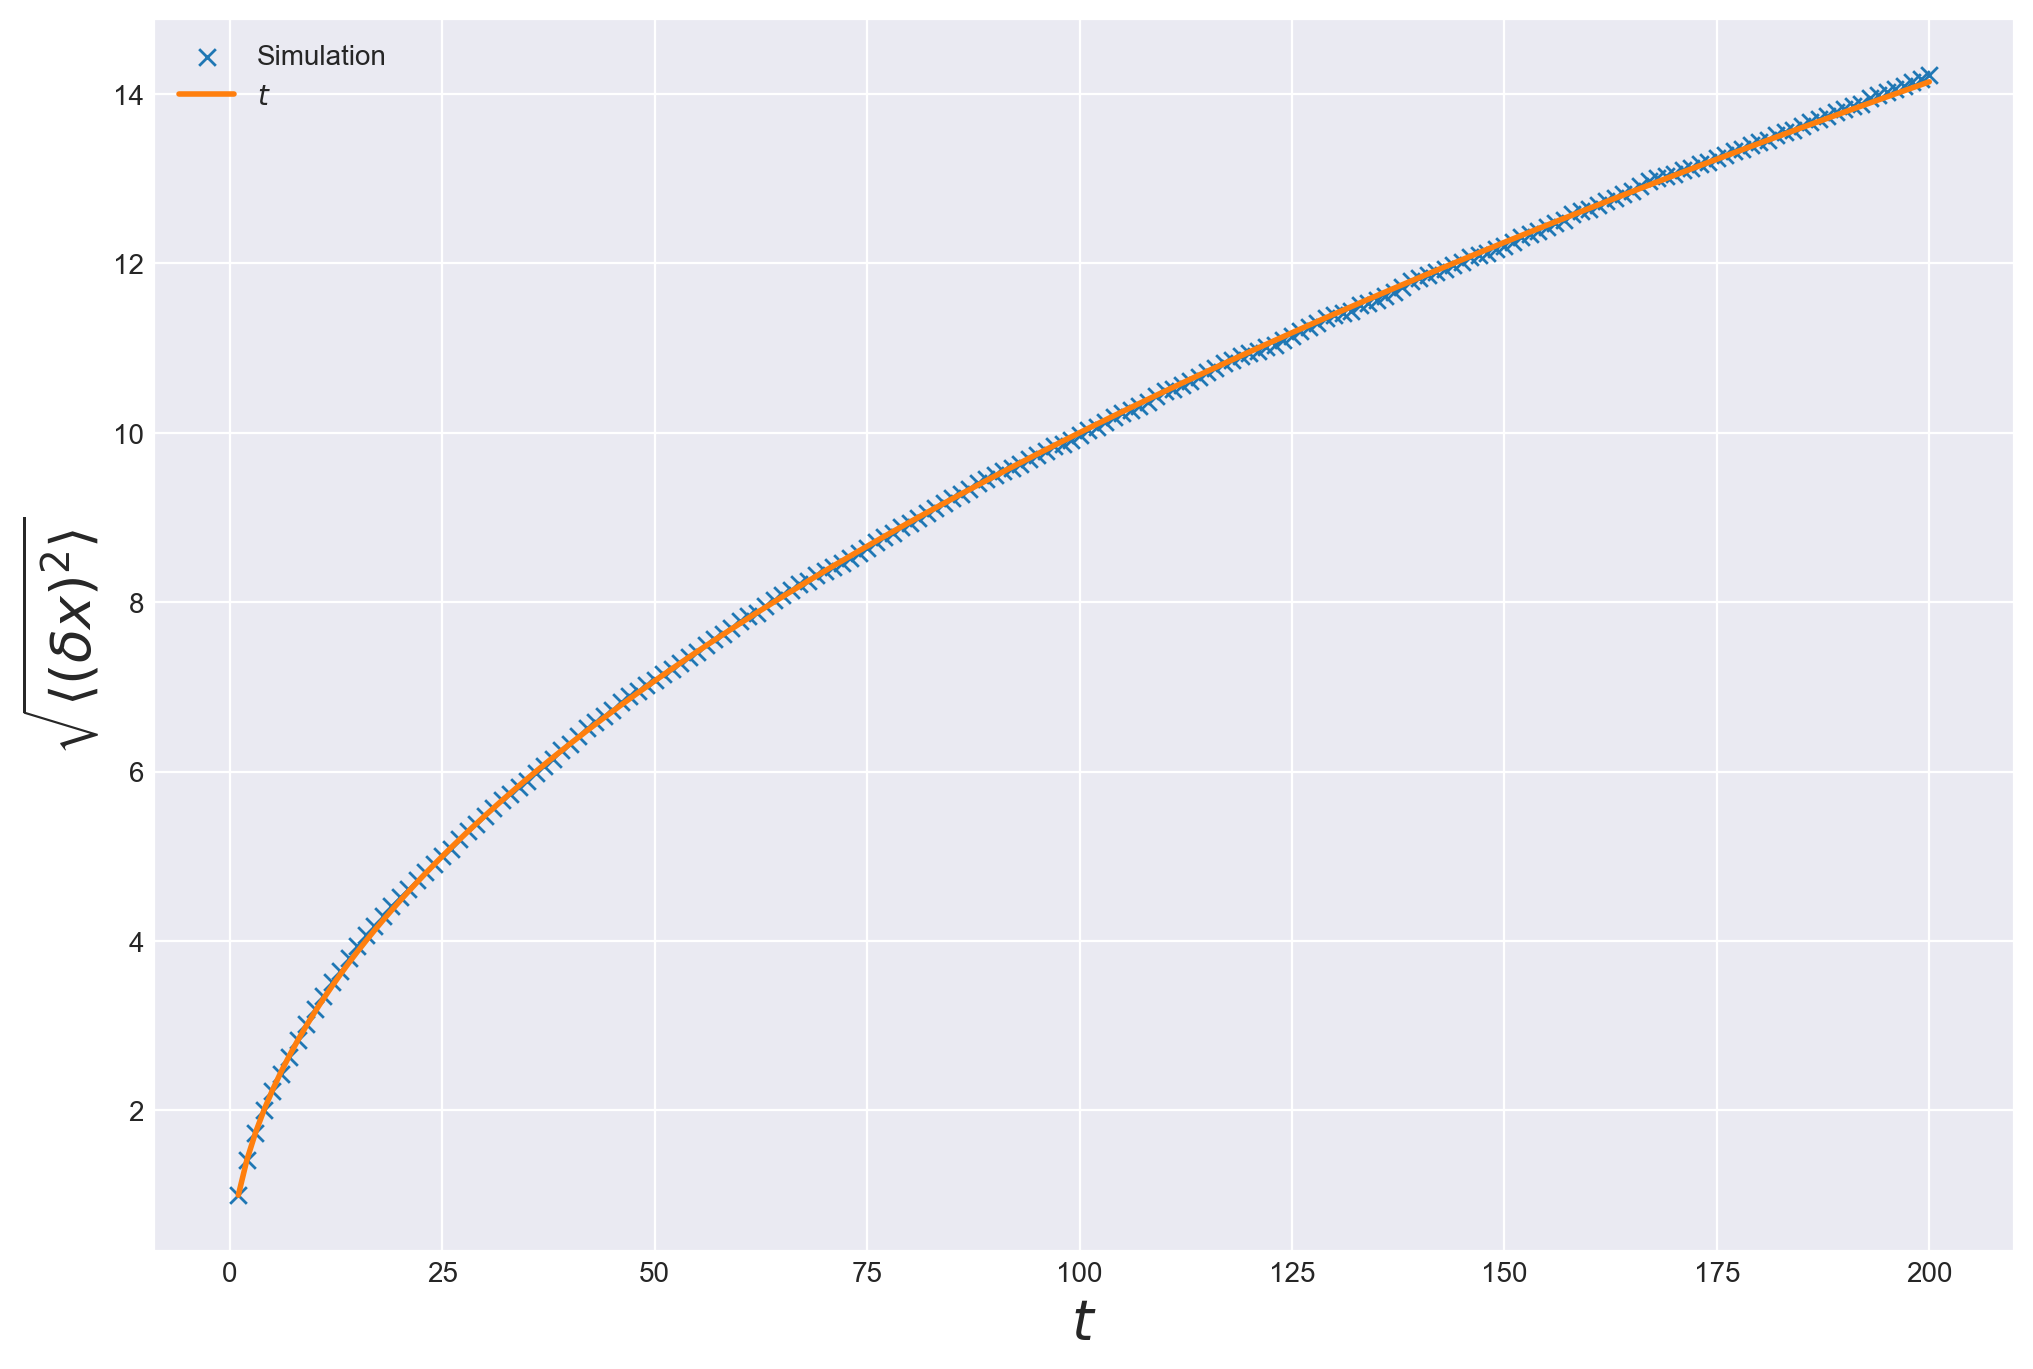

In [8]:
fig,ax=plt.subplots(figsize=(12,8))

ax.scatter(t, rms_disp, label="Simulation", marker="x", c="C0")
ax.plot(t, np.sqrt(t), label=r"$t$", c="C1", lw=2)
ax.legend()
ax.set_xlabel(r"$t$", fontsize=20) 
ax.set_ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$", fontsize=20) 

We find a well-known result in physics: the RMS distance grows as the square root of the time!   

To get a feel of how efficiently we did all the above calculations on such a huge number of elements, let us time the code used to do all the calculations. Paste the all code to do the calculations (except plotting) in the cell below:

In [9]:
%%timeit
# PASTE THE CODE HERE
n_stories = 10000 # number of stories i.e the maximum number of independent walks
t_max = 200
rng = np.random.default_rng()
steps = rng.choice([-1, 1], (n_stories, t_max))  
displacements = np.cumsum(steps, axis=1)     # COMPLETE THIS LINE OF CODE
# COMPLETE THESE THREE LINES OF CODE
sq_displacement = displacements ** 2                      #squared displacement
mean_sq_disp = np.mean(sq_displacement, axis =0)                            #mean squared displacement along the story axis
rms_disp = np.sqrt(mean_sq_disp)                                 # root mean squared displacement

24.2 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


For comparison we will do a very simple calculation on the same number of elements using native Python. I hope this helps you to appreciate vectorized calculations!

In [10]:
%%timeit

vals = [i for i in range(n_stories * t_max)]
new_vals = [i + 1 for i in vals]

176 ms ± 887 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Fancy Indexing

### Boolean arrays and logical operations

Just like `int` and `float` the elements of a NumPy array can also be boolean values i.e. `True` or `False`. These arrays may be created as a result of element wise comparison between two arrays.

In [11]:
a1 = np.array([1, 2, 3, 4])
b1 = np.array([4, 2, 2, 4])

What do you expect the output of these operations to be?

In [12]:
actual = a1 == b1
expected = np.array([False, True, False, True])

print(np.array_equal(expected,actual))

True


In [13]:
actual = a1 >= b1
expected = np.array([False, True, True, True])

print(np.array_equal(expected, actual))

True


**NOTE:** if we want to check whether two arrays are identical to each other, we can use the function `np.array_equal()`

Element wise logical operations can be done using `np.logical_and()`, `np.logical_or()`, and `np.logical_not()`.

In [14]:
a2 = np.array([True, True, False, False])
b2 = np.array([True, True, False, False])

In [15]:
actual = np.logical_and(a2, b2)
expected = np.array([True, True, False, False])

print(np.array_equal(actual, expected))

True


**NOTE:** In addition to the `np.logical_and()`, `np.logical_or()`, and `np.logical_not()` predefined functions, the binary operators `&`, `|` and `~` can also be used to determine element wise AND, OR and NOT **if the arrays are boolean arrays** but this will produce unexpected results with `int` or `float` arrays.   
When performing `sum()` on boolean arrays, the `True` values are treated as 1 and `False` as zero.

In [16]:
a2.sum()

2

In [17]:
a2.astype(int)

array([1, 1, 0, 0])

It is also possible to convert an integer array to a Boolean, with 0s treated as `False` and any non-zero element as `True`.

In [18]:
a3 = np.array([1, 2, 3, 4, 0, 0, -5])

In [19]:
a3.astype(bool)

array([ True,  True,  True,  True, False, False,  True])

In [20]:
a3.astype(bool).sum()

5

### Exercises

Print a boolean array that returns true if the array element of `a1` is the same as `b1` but different than `c1`

In [21]:
a1 = np.array([1, 2, 3, 4])
b1 = np.array([4, 2, 2, 4])
c1 = np.array([3, 3, 3, 3])

# Write code here:
np.logical_and((a1 == b1), (a1 != c1))

array([False,  True, False,  True])

Count how many elements a1 has in common with b1 or c1

In [22]:
# Write code here:
np.sum(np.logical_or((a1 == b1), (a1 == c1)))

3

### Indexing with boolean arrays

If instead of using integers we index arrays with other boolean arrays of same (or compatible) shape, the returned array will be composed of elements of the original array for which the corresponding boolean index was True. For example

In [23]:
a1

array([1, 2, 3, 4])

In [24]:
a1[[True, False, False, True]]

array([1, 4])

We may have an array of data where negative values indicate some kind of error. We can use a boolean *mask* to select array elements which satisfy our criteria

In [25]:
x = np.array([1.2, 2.8, 3.5, -999, 2.7, 4.8, -999])

mask = (x > 0)
mask

array([ True,  True,  True, False,  True,  True, False])

In [26]:
x[mask]

array([1.2, 2.8, 3.5, 2.7, 4.8])

Often it is done in a single step

In [27]:
x[x > 0]

array([1.2, 2.8, 3.5, 2.7, 4.8])

We can also set specific values for array elements which satisfy our criteria

In [28]:
x[x<0] = np.nan
x

array([1.2, 2.8, 3.5, nan, 2.7, 4.8, nan])

**NOTE:** `np.nan` is a special data object (of type `float`) which is used to denote invalid or missing values. NumPy is built to gracefully handle invalid or missing data points as long as they are marked with `NaN` (Not a Number). This is the recommended way of doing this instead of the more traditional way of denoting missing data with absurd numbers. For convenience, NumPy has a host of such special constants defined which are listed [here](https://numpy.org/doc/stable/reference/constants.html?highlight=constants).

### Exercises

Return an array with the elements that are in both `a1` and `b1`

In [29]:
# Write code here
a1[a1 == b1]

array([2, 4])

Replace all values of the array below that are either negative or greater than one with `nan`

In [30]:
arr = np.array([[1.5, -3.4, -0.1, 2.], [-0.9, 0.4, 1.1, 0.8]])

# Write code here
arr[np.logical_or((arr < 0), (arr > 1))] = np.nan
arr

array([[nan, nan, nan, nan],
       [nan, 0.4, nan, 0.8]])

### Reducing Boolean Expressions

The `np.logical_and` and `np.logical_or` functions only take two arrays as arguments. Sometimes, you may want to compare more than two boolean arrays. In the examples above we acomplished this task like this...

In [31]:
a2 = np.array([True, True, False, False])
b2 = np.array([True, True, False, False])
c2 = np.array([False, True, False, True])

np.logical_and(np.logical_and(a2, b2), c2)

array([False,  True, False, False])

We can also use the function "reduce". This is a function of the `np.logical_and` class.

In [32]:
np.logical_and.reduce?

Docstring:
reduce(array, axis=0, dtype=None, out=None, keepdims=False, initial=<no value>, where=True)

Reduces `array`'s dimension by one, by applying ufunc along one axis.

Let :math:`array.shape = (N_0, ..., N_i, ..., N_{M-1})`.  Then
:math:`ufunc.reduce(array, axis=i)[k_0, ..,k_{i-1}, k_{i+1}, .., k_{M-1}]` =
the result of iterating `j` over :math:`range(N_i)`, cumulatively applying
ufunc to each :math:`array[k_0, ..,k_{i-1}, j, k_{i+1}, .., k_{M-1}]`.
For a one-dimensional array, reduce produces results equivalent to:
::

 r = op.identity # op = ufunc
 for i in range(len(A)):
   r = op(r, A[i])
 return r

For example, add.reduce() is equivalent to sum().

Parameters
----------
array : array_like
    The array to act on.
axis : None or int or tuple of ints, optional
    Axis or axes along which a reduction is performed.
    The default (`axis` = 0) is perform a reduction over the first
    dimension of the input array. `axis` may be negative, in
    which case it counts from the la

Try using the reduce function to compare arrays a2, b2, and c2 simultaneously. Use the docstring to determine the correct syntax.

In [33]:
np.logical_and.reduce((a2, b2, c2))

array([False,  True, False, False])

This function is especially useful if we have many arrays to reduce...or even a multidimensional array to reduce! For example, let's say we have a 2-dimensional array representing the grades of each student for several assignments where each row represents a student and each column represents an assignment.

In [34]:
gradebook = np.array([[0.73, 0.65, 0.92, 0.82],
                      [0.77, 0.82, 0.83, 0.93],
                      [0.60, 0.54, 0.95, 0.89]])

Try using the np.logical_and.reduce() function to find out if all students got above a 75% on each assignment.

In [35]:
np.logical_and.reduce(gradebook > 0.75)

array([False, False,  True,  True])

Now calculate which students received above a 75% on every assignment.

In [36]:
np.logical_and.reduce(gradebook > 0.75, axis=1)

array([False,  True, False])

## Exercise 1: Masking lines in a spectrum

An `.npy` file (`data/sdss_spectra.npy`) has been provided containing the spectrum of a galaxy. 
- The `0th` axis corresponds to the wavelength sampling 
- The `1th` axes has 3 elements: 
    - The `0th` element is the wavelength grid 
    - The `1th` element is the measured (and normalized) flux and 
    - The `2th` element gives the flux errors 
    
First, let's read in the data and unpack them into separate arrays.

When plotting data from a file I haven't used before, I personally always like to 'look' at the data so I can understand its shape better. I have attached print statements to help. I look at the shape of the data and then an element of the data.  In addition, whenever I perform an operation which may change the shape of the data, I also print the shape again to make sure it is changed correctly.

In [37]:
data_path = Path("../data/sdss_spectra.npy")
#COMPLETE THESE THREE LINES OF CODE

#
data = np.load(data_path) #read in the data
print(np.shape(data))
print(data[0]) # This prints the very first element of our wavelength sampling
#

wavelength = data[:, 0] #allocate the proper 1D slices
flux = data[:, 1]
flux_err = data[:, 2]

(3365, 3)
[ 3.66015941e+03 -2.20280328e-01  3.35821802e-01]


The hard part is done, let's plot the spectrum!

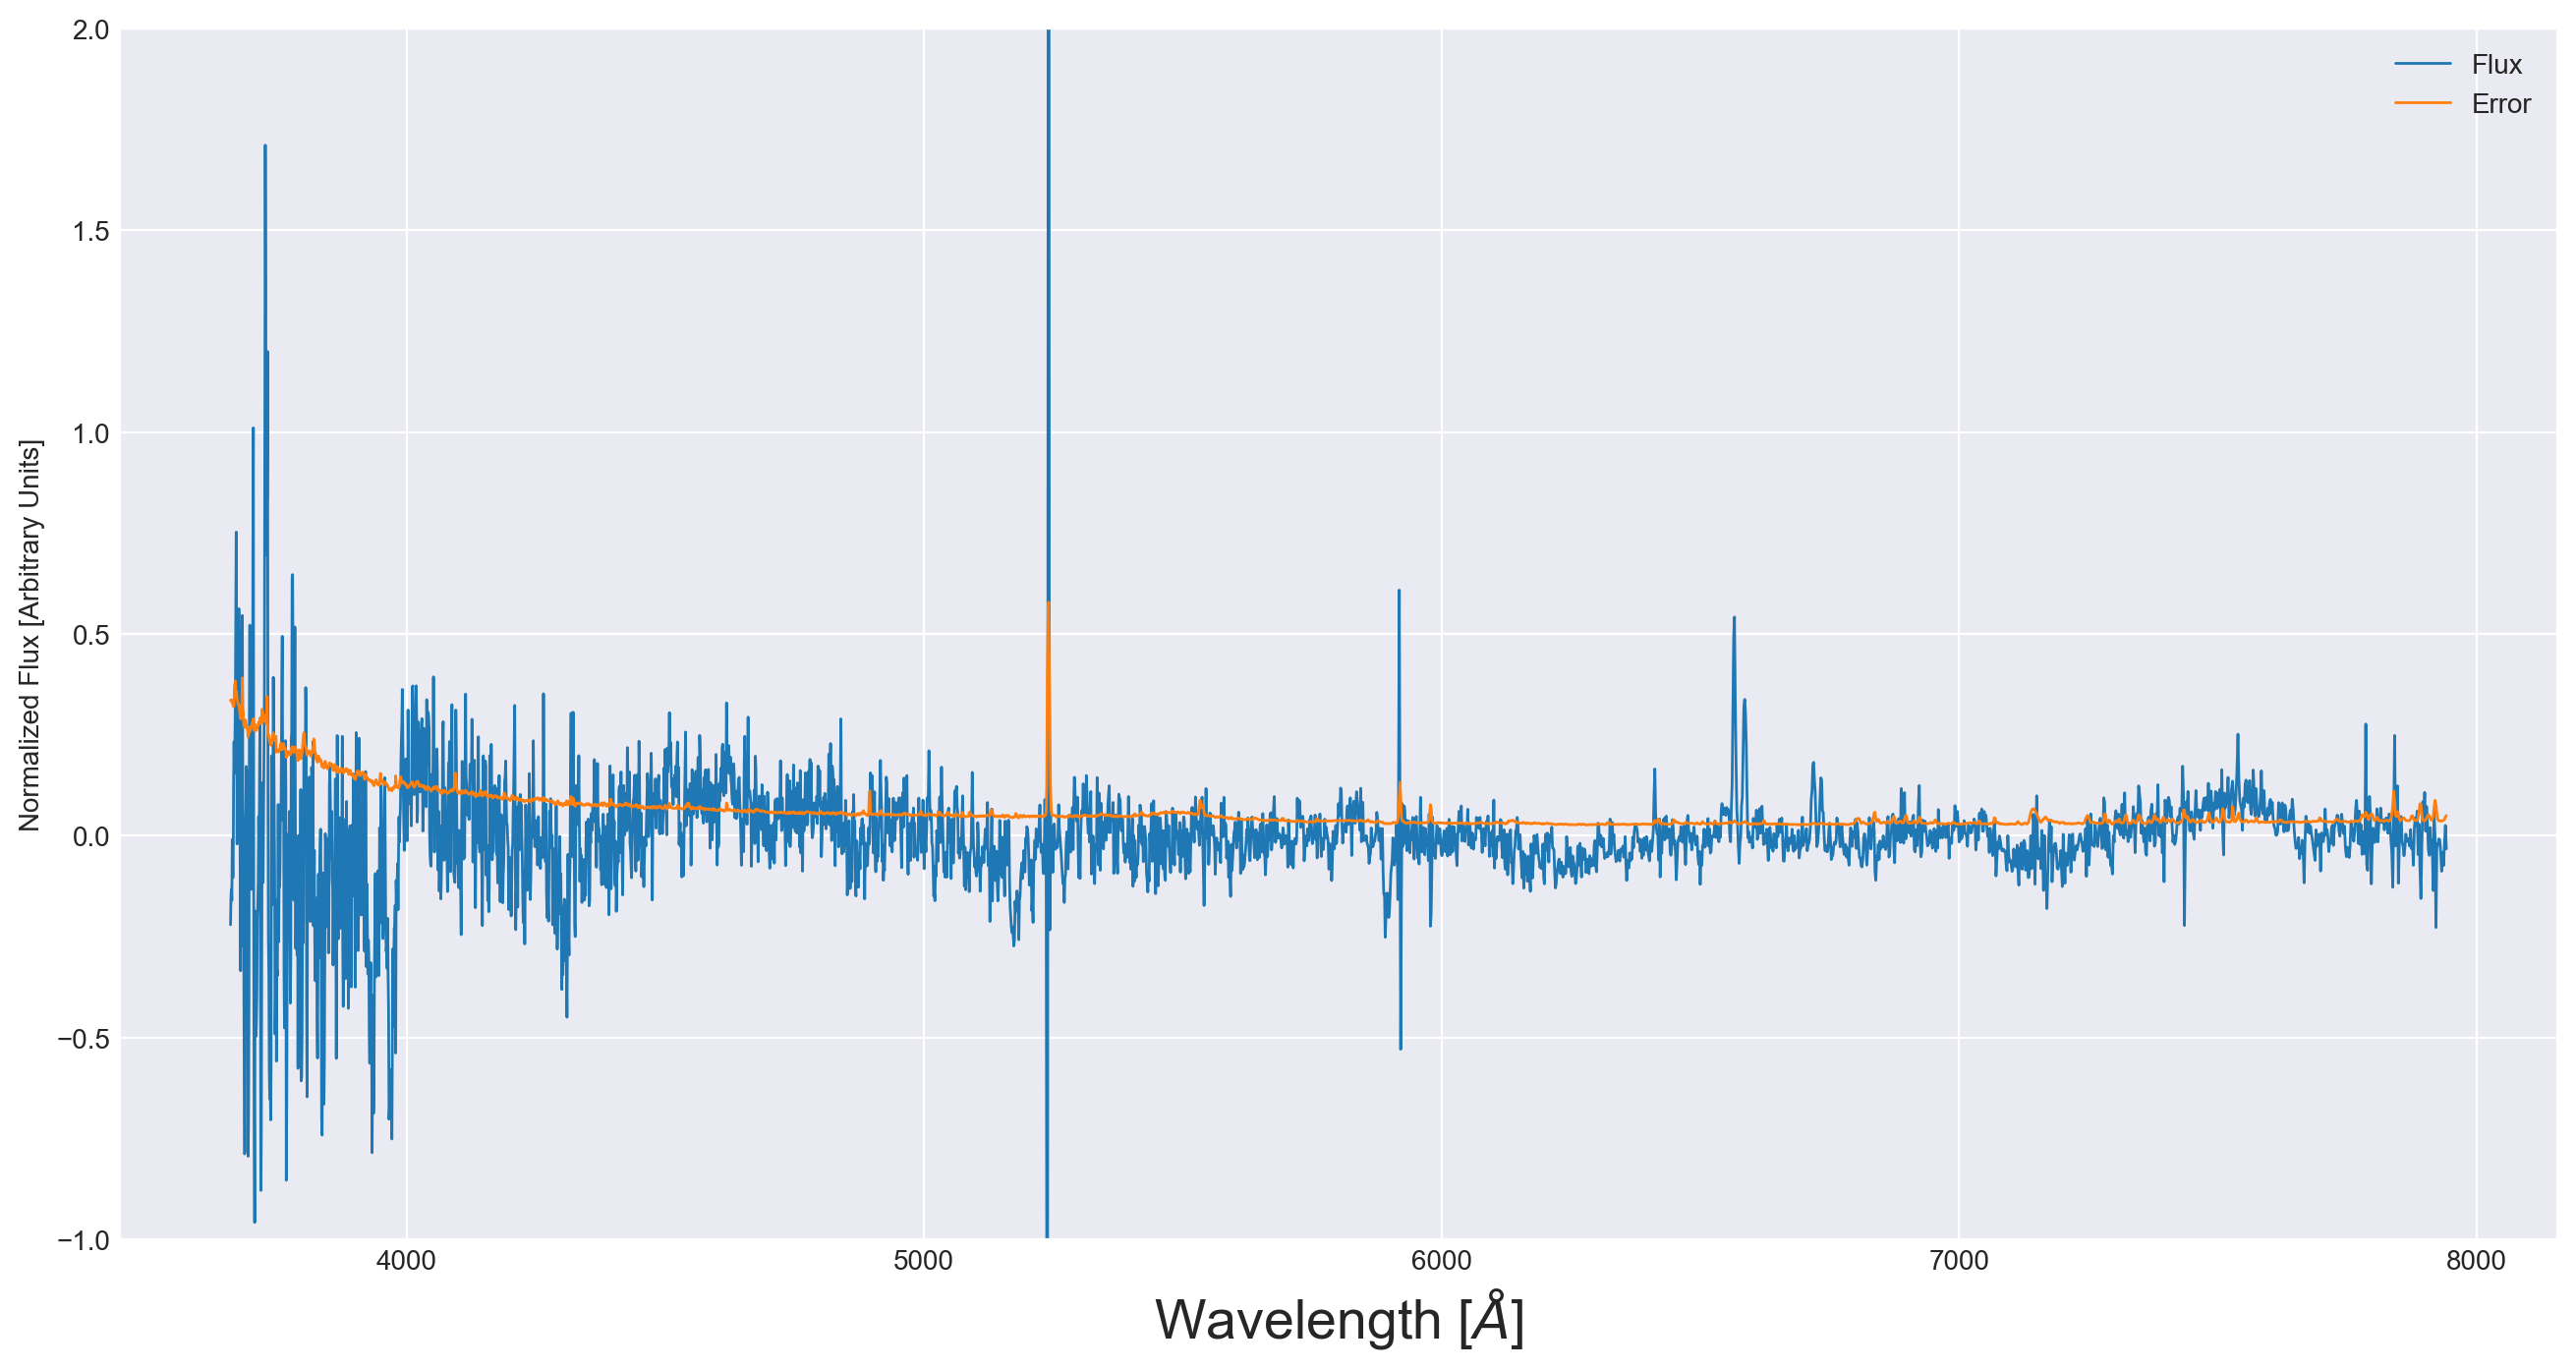

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(wavelength, flux, label="Flux")
ax.plot(wavelength, flux_err, label="Error")
ax.set_ylim(-1, 2)
ax.set_xlabel("Wavelength [$\AA$]", fontsize=20)
ax.set_ylabel("Normalized Flux [Arbitrary Units]")
ax.legend()

This spectrum looks good but there are large errors here. We should reject all flux values for which the error is greater than 0.2. We will first create a boolean mask.

In [39]:
#
good_data_mask = flux_err <= 0.2  # COMPLETE THIS LINE OF CODE
#

Now let's use this mask to index our arrays.

Remember: We can do this one of two ways, we can use our recently created `good_data_mask` or we can use a logic statment

In [40]:
# COMPLETE THESE TWO LINES OF CODE
#
good_wavelength = wavelength[good_data_mask]
good_flux = flux[good_data_mask]
#

Let's plot our masked array

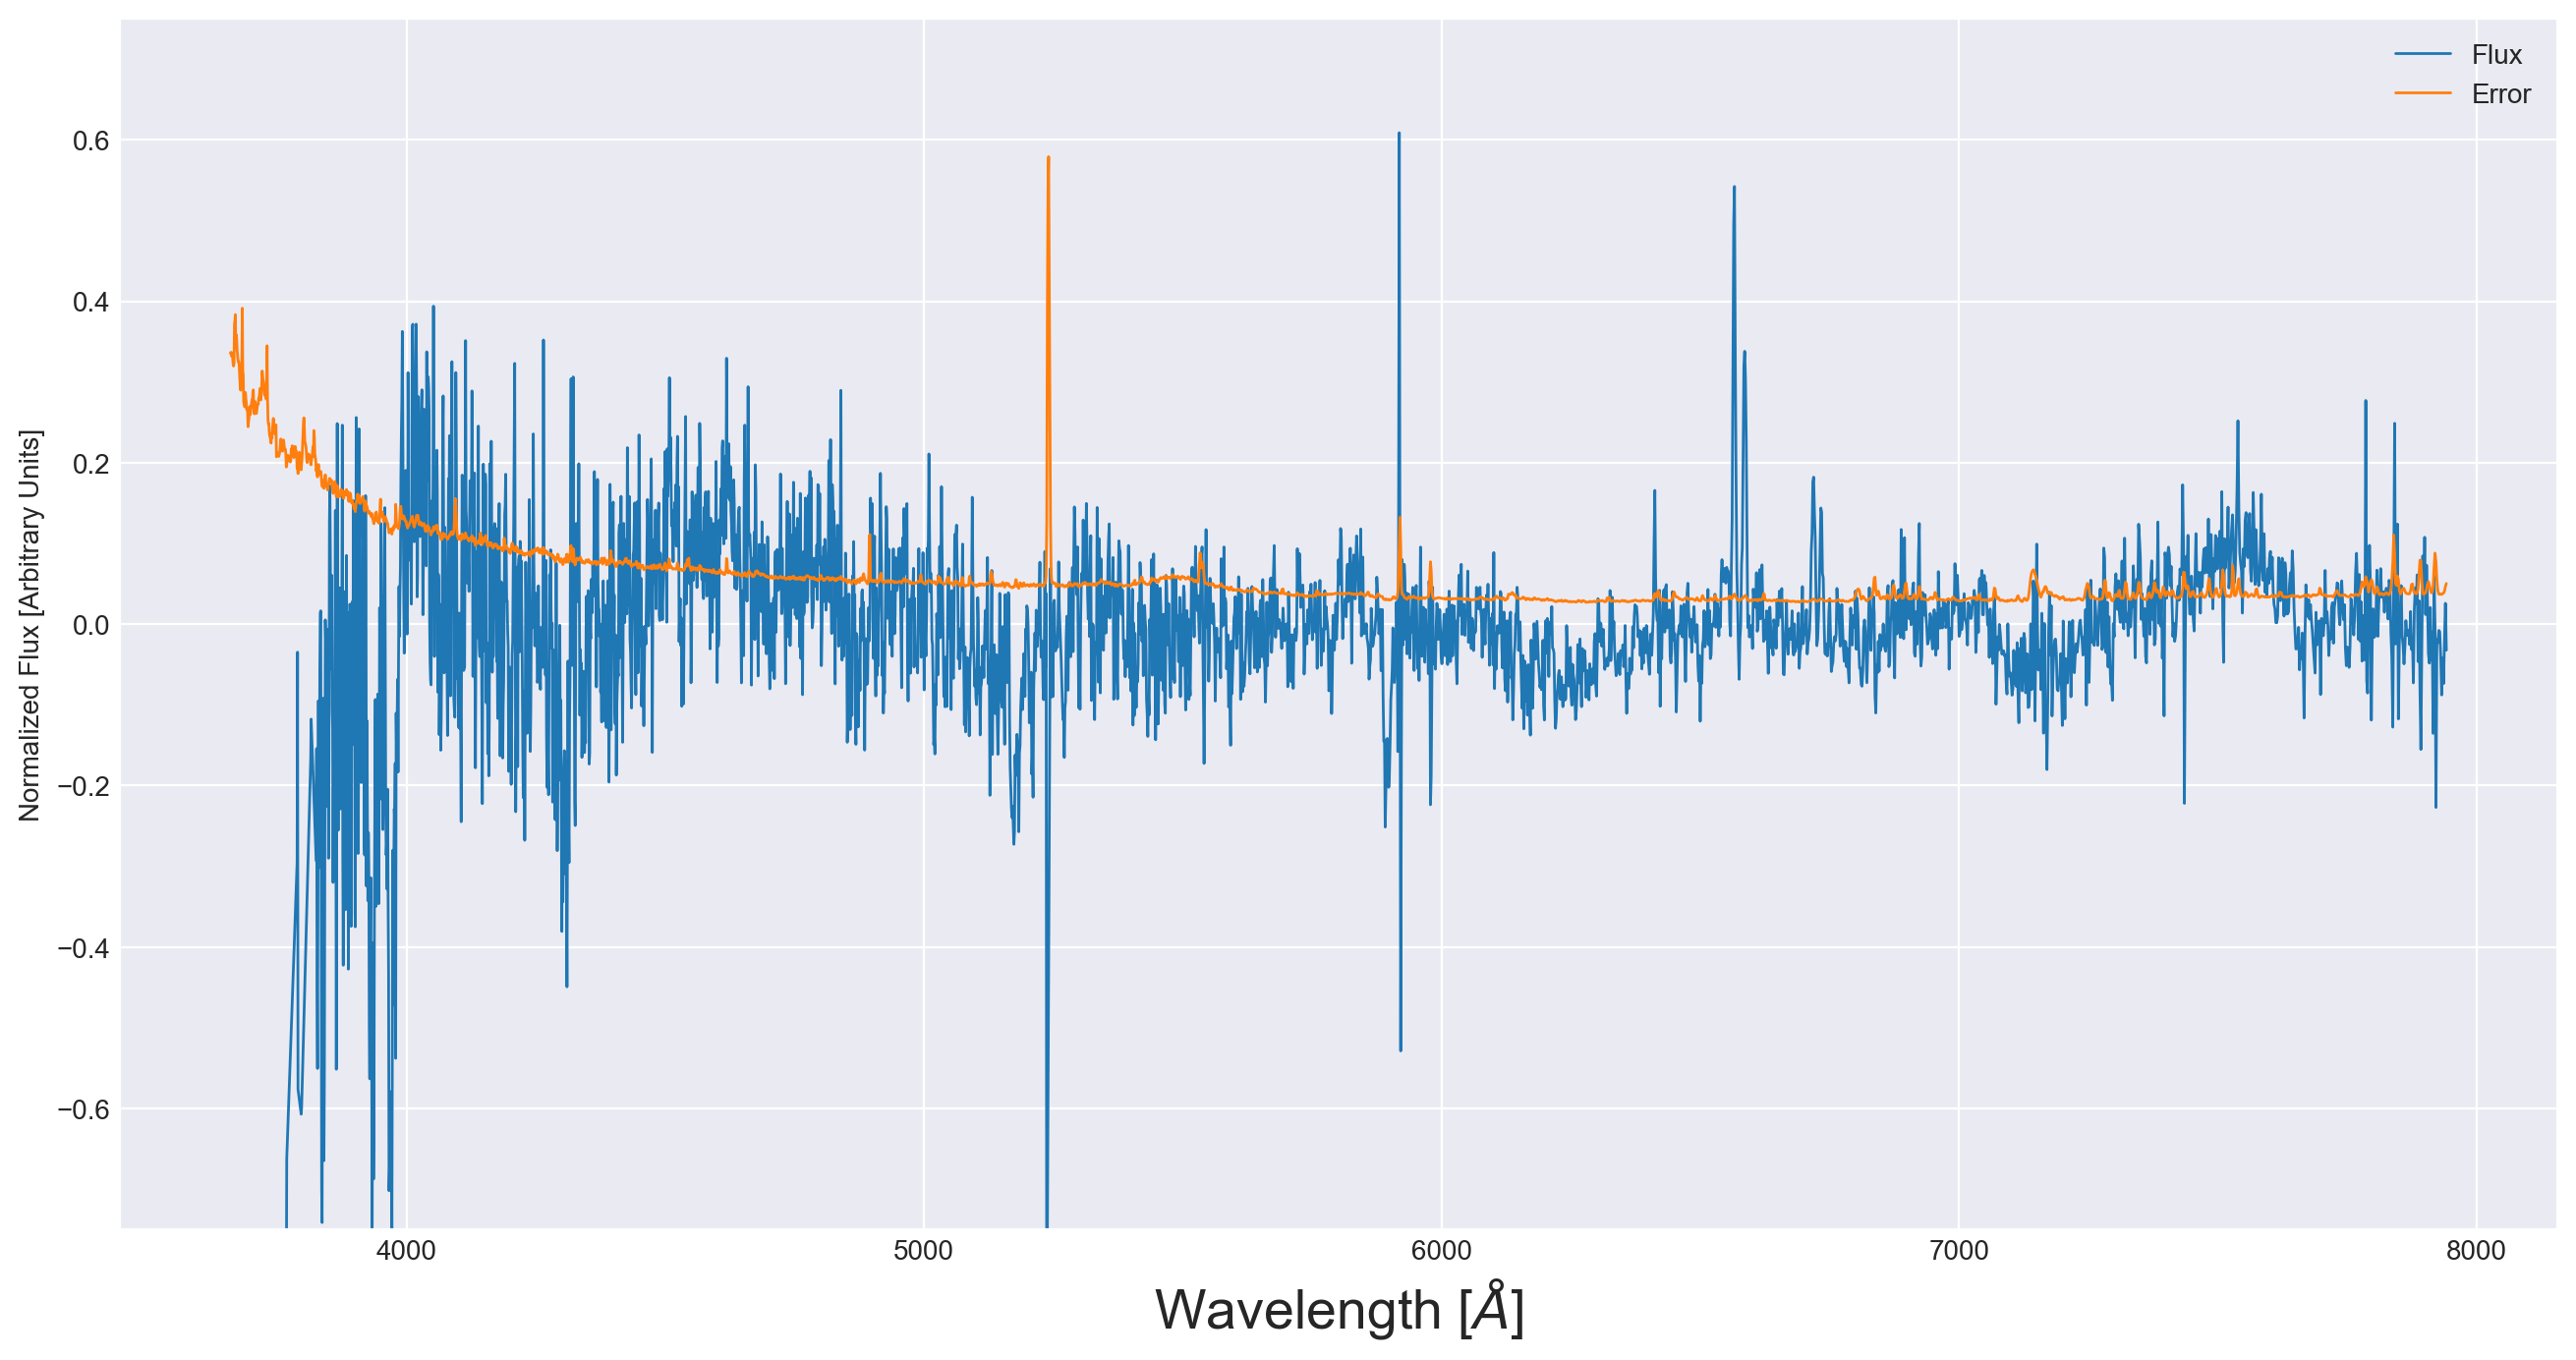

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(good_wavelength, good_flux, label="Flux")
ax.plot(wavelength, flux_err, label="Error")
ax.set_ylim(-0.75, 0.75)
ax.set_xlabel("Wavelength [$\AA$]", fontsize=20)
ax.set_ylabel("Normalized Flux [Arbitrary Units]")
ax.legend()

We can see emission and absorption lines in the above spectrum. Let's try to get rid of them by keeping flux values which are less than $2\sigma$ away from the mean. 

i.e. $F - \bar{F} < \pm 2\sigma$

For this you need to use the numpy functions `np.mean()`, `np.std()` and the `&` boolean operator. (Alternatively the `np.abs()` function can also be used).

In [42]:
#COMPLETE THIS LINE OF CODE
#
cont_mask = np.abs(good_flux - np.mean(good_flux)) <= 2 * np.std(good_flux)
#

Let's plot and see what we have selected using this mask.

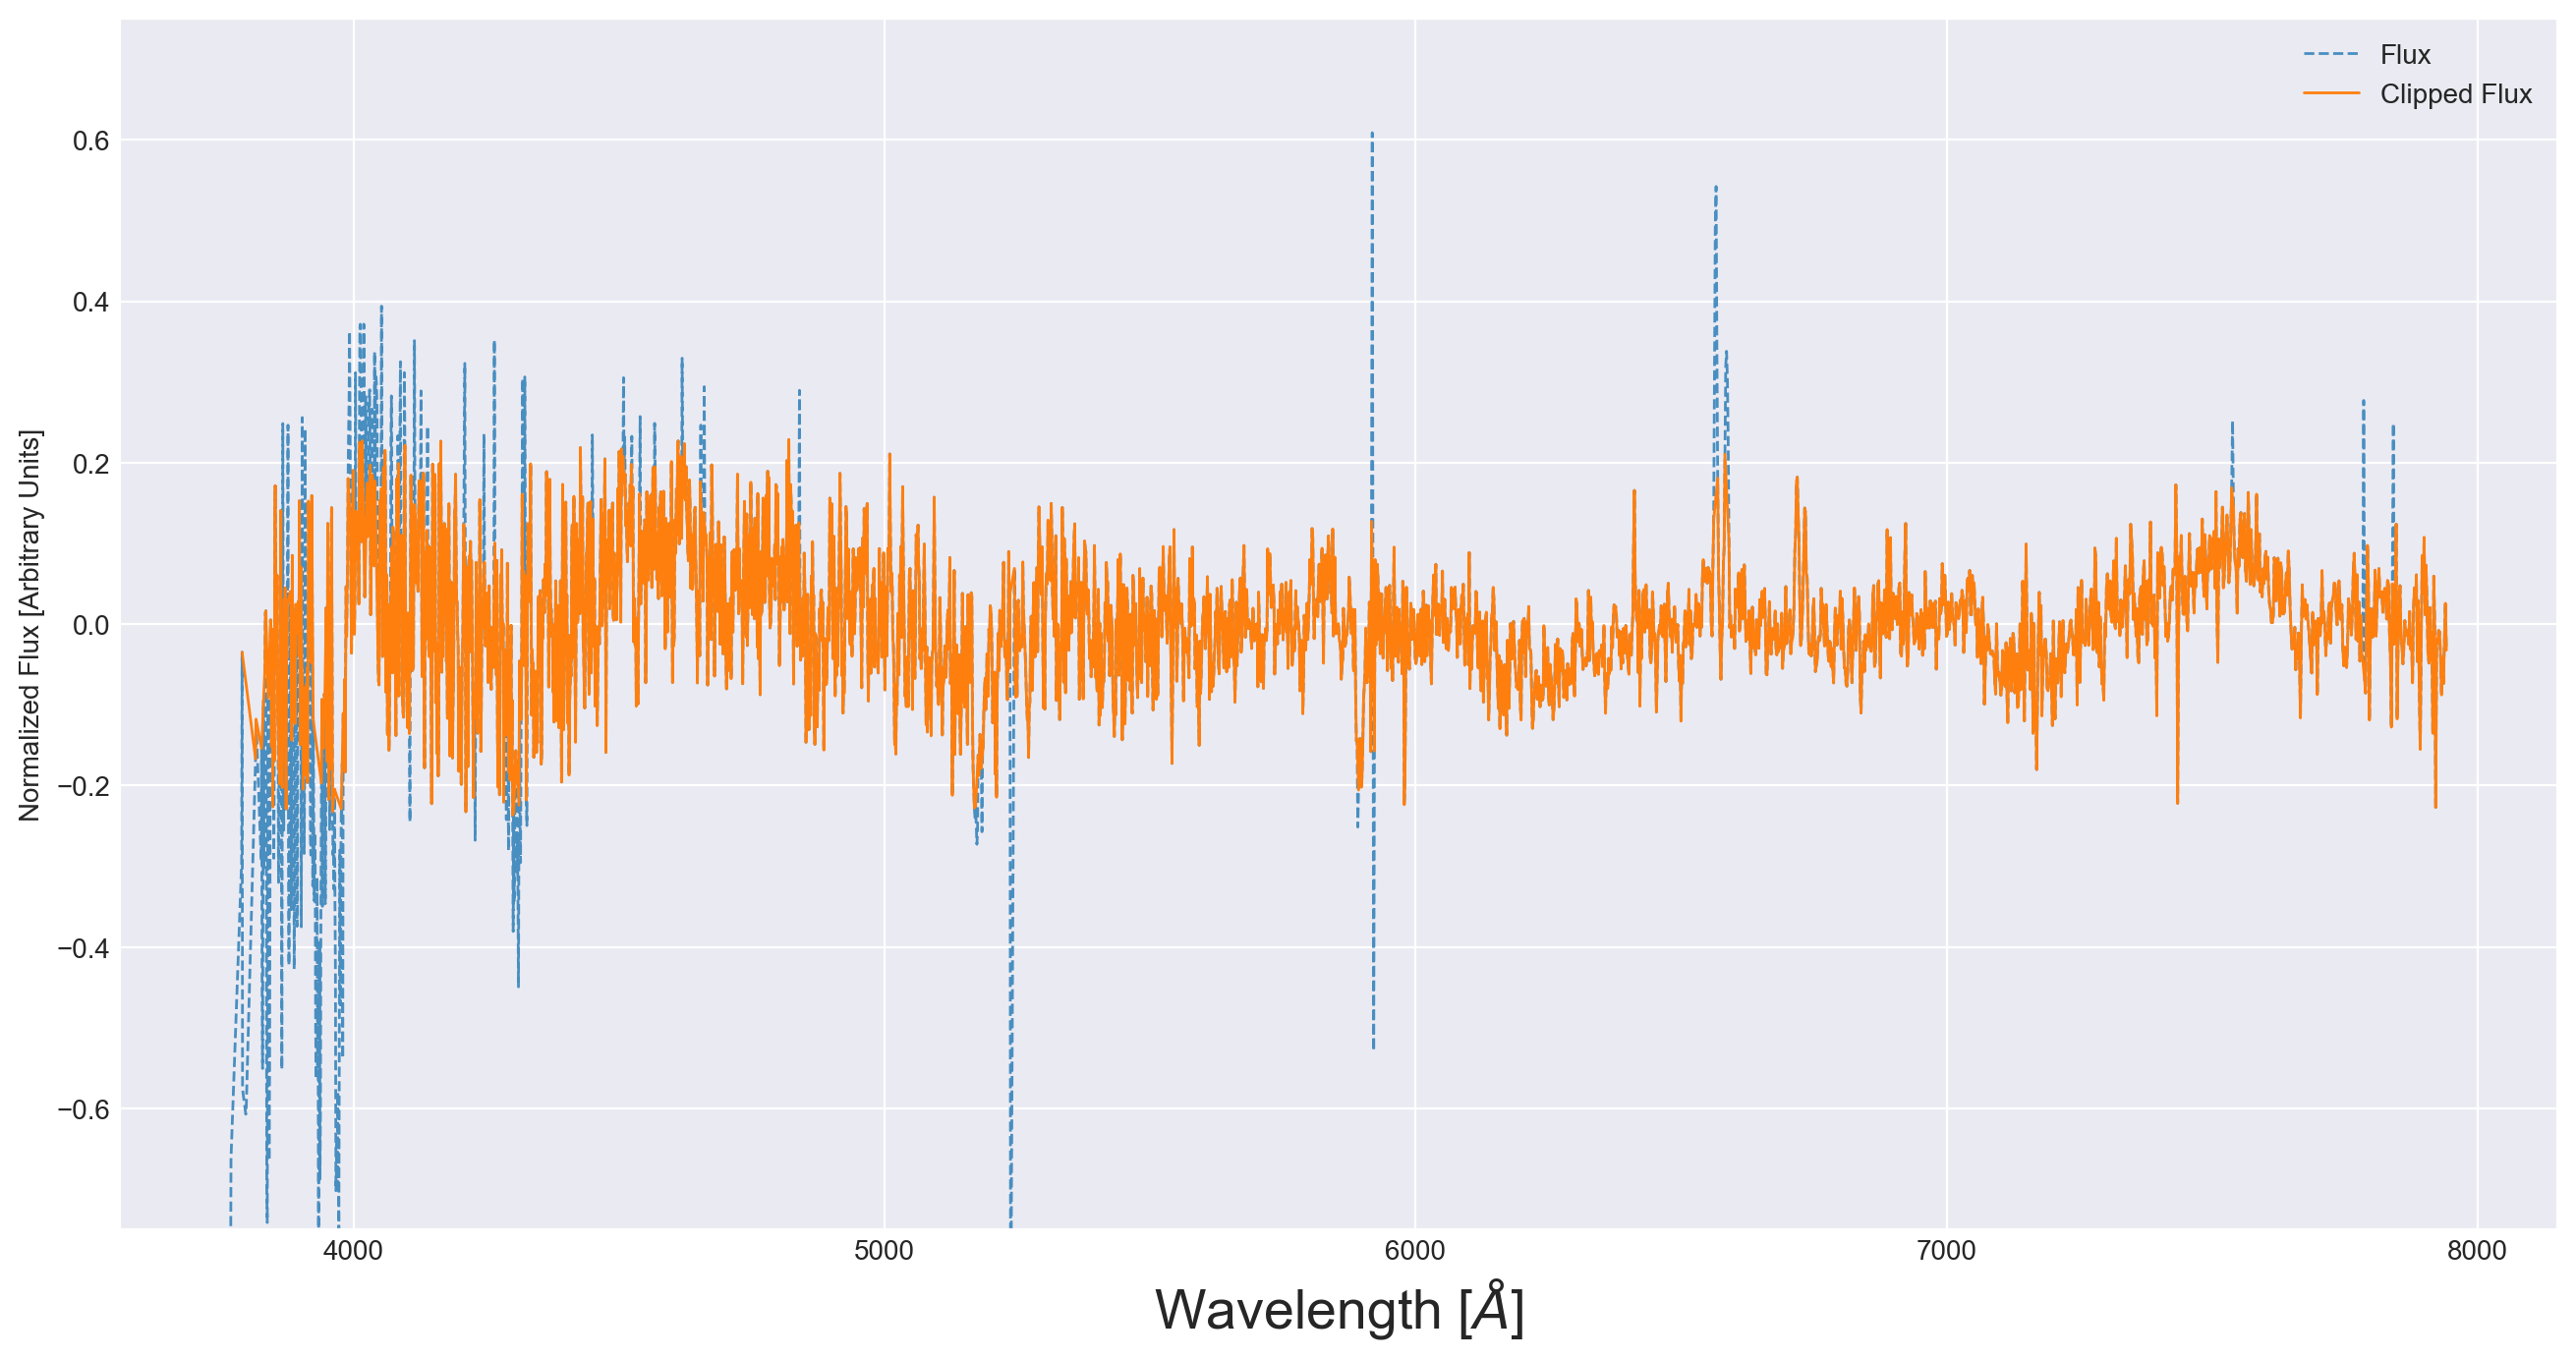

In [43]:
cont_wavelength = good_wavelength[cont_mask]
cont_flux = good_flux[cont_mask]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(good_wavelength, good_flux, label="Flux", ls="--", alpha=0.8)
ax.plot(cont_wavelength, cont_flux, label="Clipped Flux")

ax.set_ylim(-0.75, 0.75)
ax.set_xlabel("Wavelength [$\AA$]", fontsize=20)
ax.set_ylabel("Normalized Flux [Arbitrary Units]")
ax.legend()

Now that's a good looking spectrum!

## Exercise 2: Measuring the strength of a line

I have provided a data file (`sn_data.npy`) which contains multiple spectra of a supernova as it evolves over time.  These "data" are calculated theoretically from a radiative-transfer code.  I would like to analyze the spectra to see how the emission from <b>carbon monoxide</b> changes over time.  



This is a large data file with a lot of dimensions, so let's examine it carefully and make sure we understand its structure before doing calculations.

### Load and examine the data

First let's load in the data the same as before, using `np.load`, and look at its shape:

In [44]:
# COMPLETE THESE LINES OF CODE

# fill in these (same as previous example)

#
sn_data_path = Path("../data/sn_data.npy")
sn_data = np.load(sn_data_path)  # read in the data
print(sn_data.shape)  # print the data shape
#

(15, 3, 20796, 1)


When you look at the <b>shape</b> of this data, you should notice that one of the dimensions has a size of 1.  You might call this a <i>dummy</i> dimension, because it isn't adding to the data:  the array including this dimension contains exactly the same data as without it.  To make dealing with this data simpler, we can reduce the number of dimensions without losing any information.  This data array also contains lots of redundant information, which we will try to deal with.

We can change the shape of the data array using `np.reshape`.

In [45]:
np.reshape?

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta

In [46]:
## remove the dummy dimension using reshape

#
reshaped_sn_data = np.reshape(sn_data, sn_data.shape[:-1])
print(reshaped_sn_data.shape)  # print the new shape
#

(15, 3, 20796)


In the remaining data, the `zeroth` axis (size 15) is the time axis.  The `first` axis (size 3) is the type of information:
- index `0` is the spectrum
- index `1` is the wavelength array
- index `2` is the time after explosion (in days)

The `second` dimension is the number of data points in the spectrum.

Note that the day is a scalar, but in the data it is given as an array, like:

In [47]:
print(reshaped_sn_data[0, 2])

[61. 61. 61. ... 61. 61. 61.]


Numpy arrays are <b>rectangular</b>, which means that all the elements must have the same size.  A Numpy array cannot have different size elements along the same axis.

Let's pull out the time information into a separate array.

In [48]:
day_list = reshaped_sn_data[:, 2, 0]
print(day_list)

[ 61.  74.  89. 103. 107. 112. 116. 121. 126. 131. 136. 142. 152. 170.
 190.]


Let's plot the first and last spectra to see what they look like.

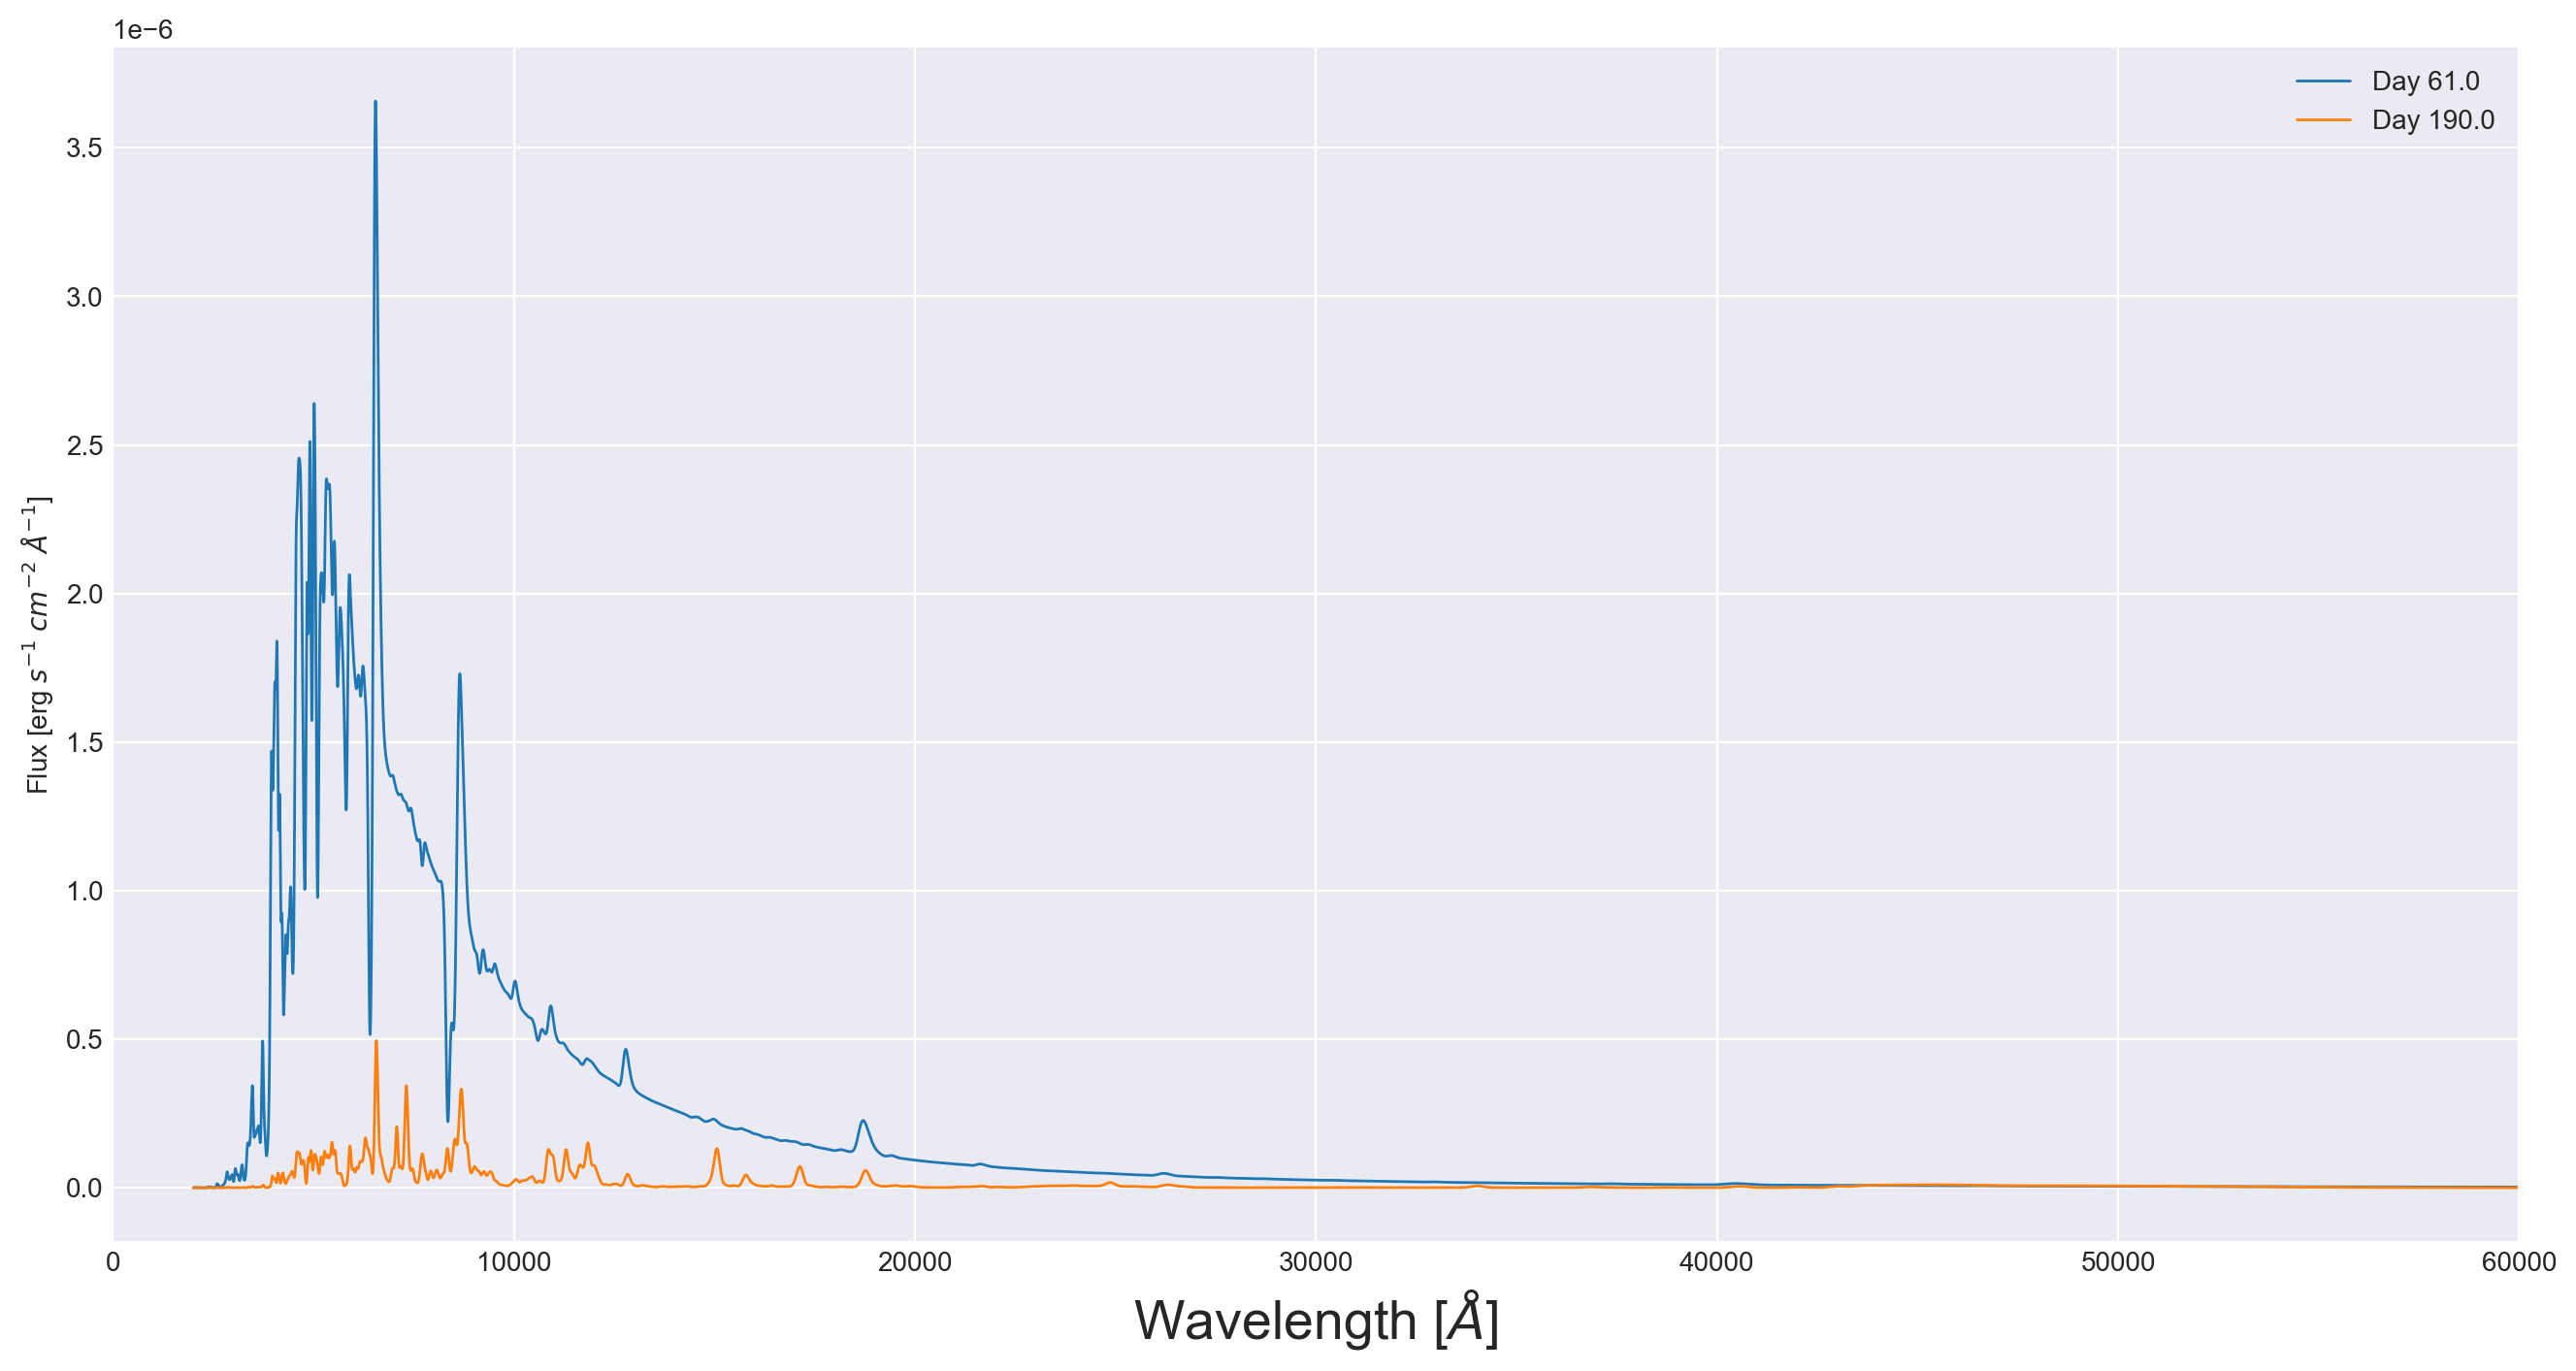

In [49]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(reshaped_sn_data[0, 1], reshaped_sn_data[0, 0], label=f"Day {reshaped_sn_data[0, 2, 0]}")
ax.plot(reshaped_sn_data[-1, 1], reshaped_sn_data[-1, 0], label=f"Day {reshaped_sn_data[-1, 2, 0]}")
ax.set_xlim(0, 60000)
ax.set_xlabel("Wavelength [$\AA$]", fontsize=20)
ax.set_ylabel("Flux [erg $s^{-1} \; cm^{-2} \; \AA^{-1}$]")
ax.legend()

It is clear that the supernova gets dimmer over time as it cools.  Now let's look at the emission from <b>carbon monoxide</b>, which arises in the infrared.

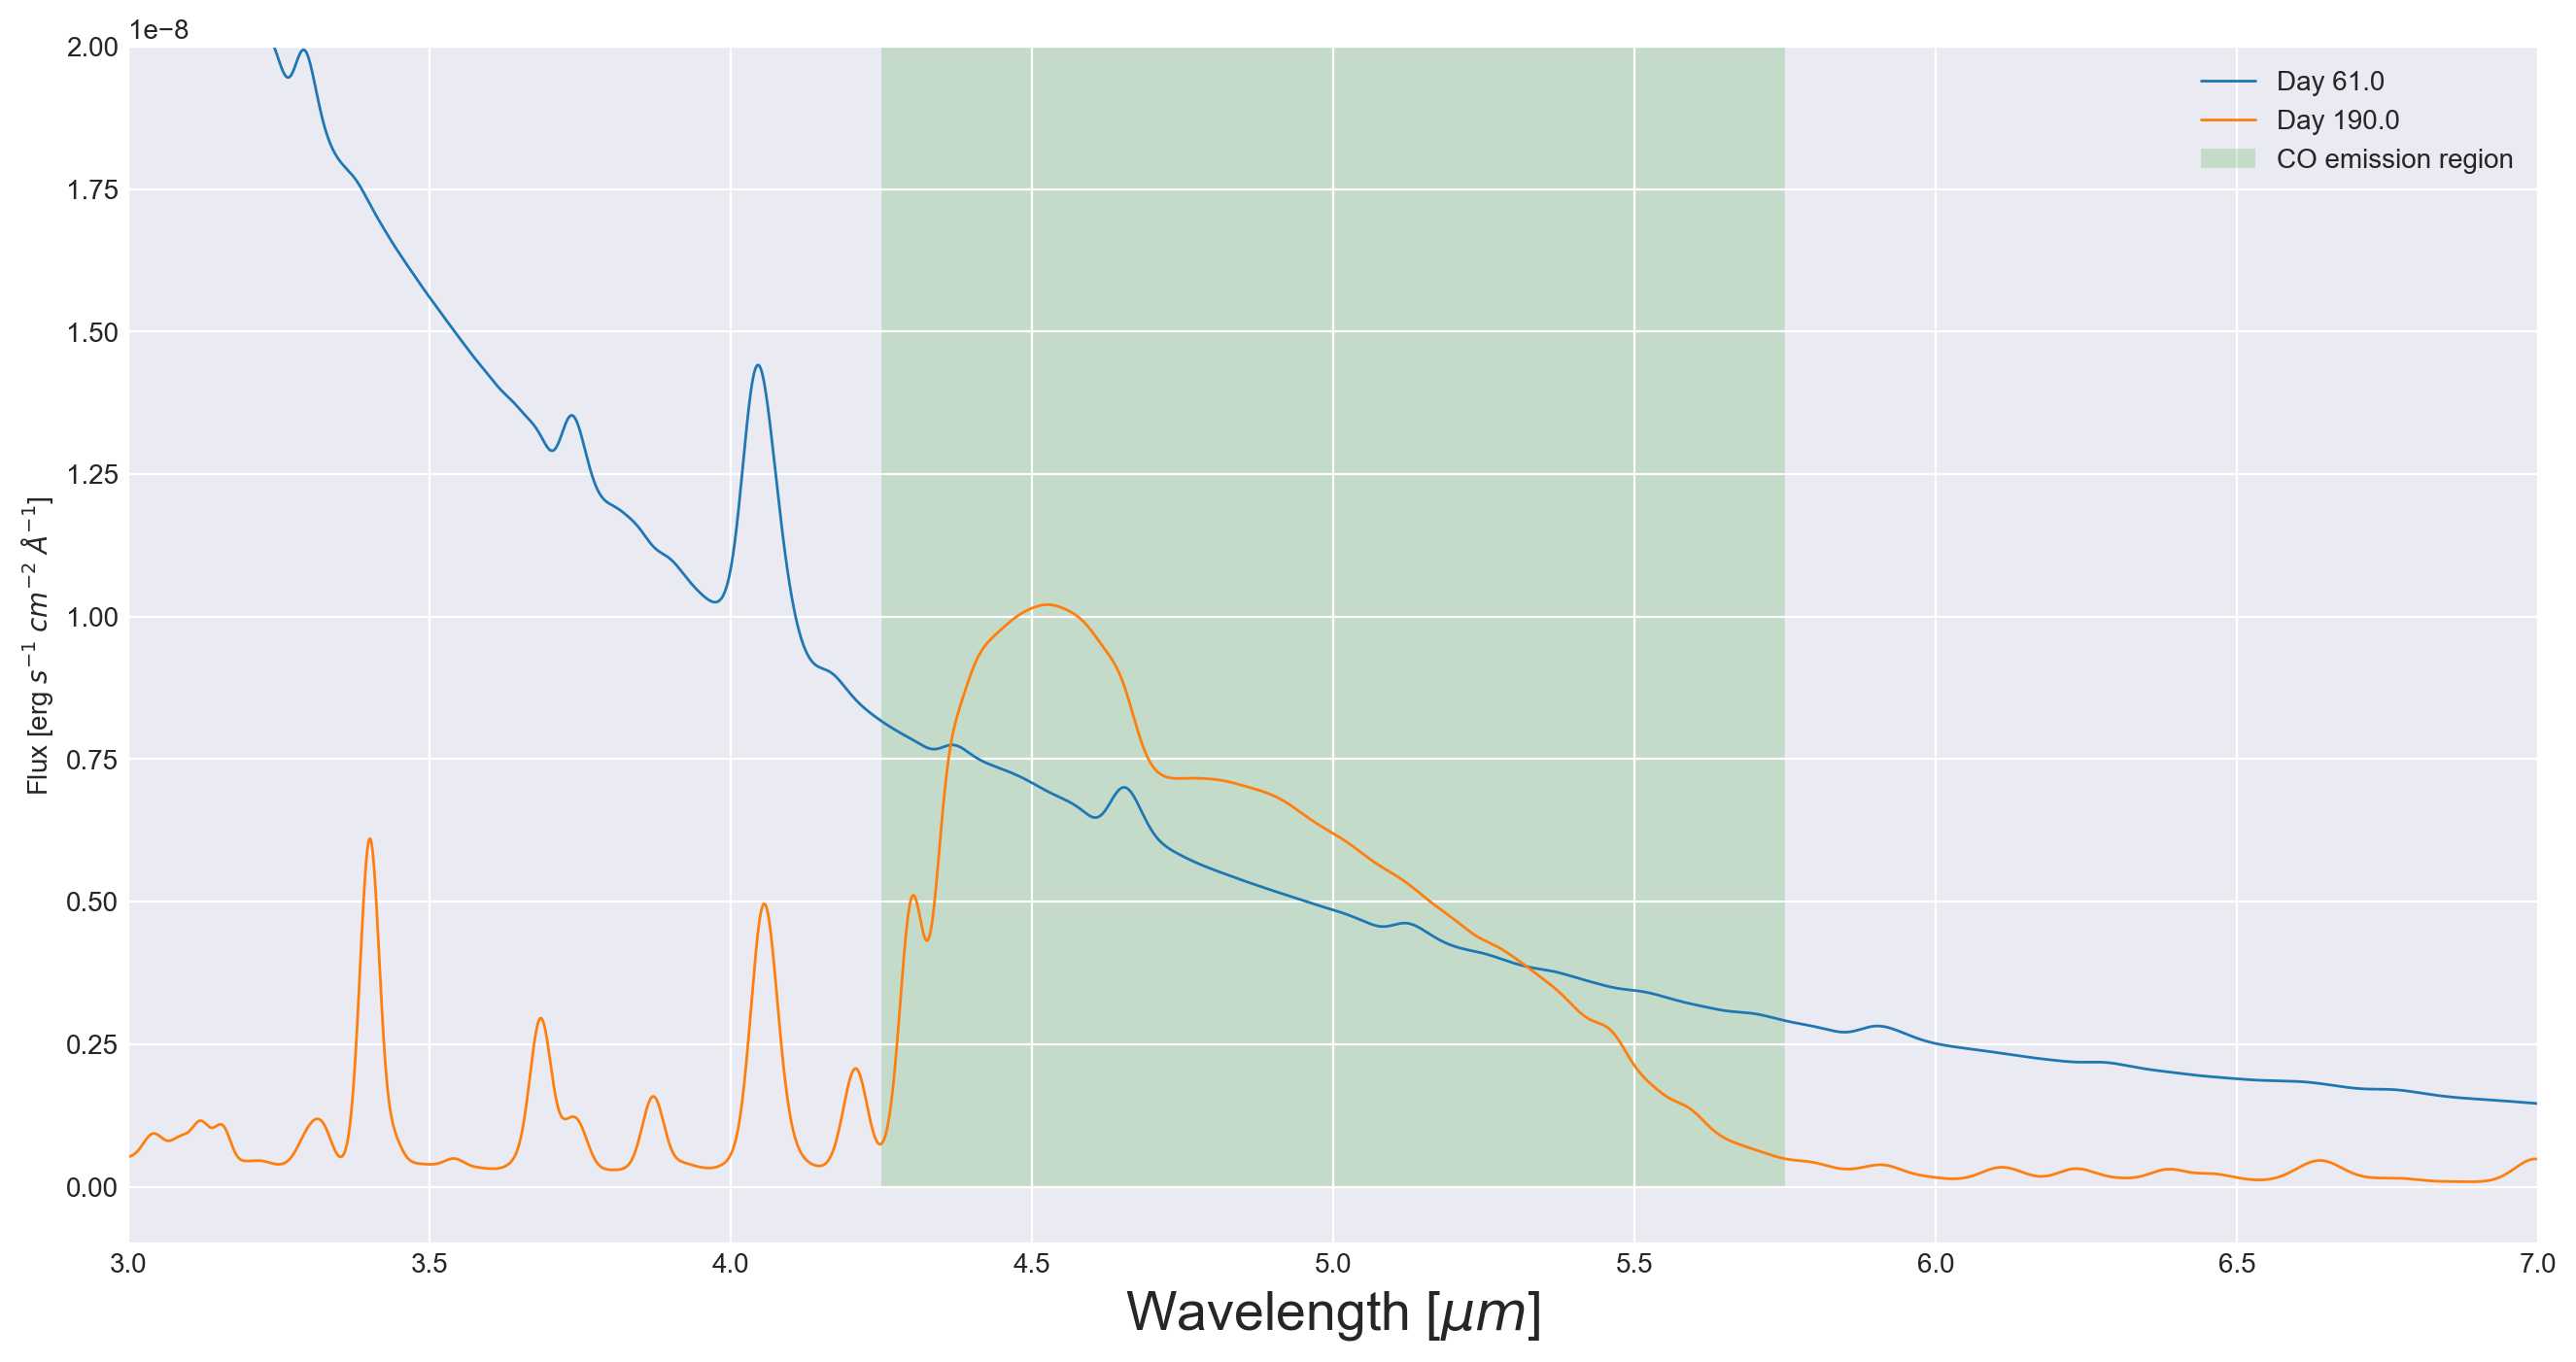

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(reshaped_sn_data[0, 1] / 1e4, reshaped_sn_data[0, 0], label=f"Day {reshaped_sn_data[0, 2, 0]}")
ax.plot(reshaped_sn_data[-1, 1] / 1e4, reshaped_sn_data[-1, 0], label=f"Day {reshaped_sn_data[-1, 2, 0]}")
rect1 = patches.Rectangle([4.25, 0], 1.5, 2e-8, alpha=0.2, zorder=-np.inf, edgecolor=None, facecolor='tab:green', label='CO emission region')
ax.add_patch(rect1)
ax.set_xlim(3, 7)
ax.set_ylim(-1e-9, 2e-8)
ax.set_xlabel("Wavelength [$\mu m$]", fontsize=20)
ax.set_ylabel(r"Flux [erg $s^{-1} \; cm^{-2} \; \AA^{-1}$]")
ax.legend()

Now the situation is a little more complicated: the emission from <b>carbon monoxide</b> increases over time.

#### Now let's make a plot of the Carbon Monoxide emission as a function of time for this supernova model.

Although explicitly listed for each time step, the wavelength arrays are actually identical.  We can check that using boolean operations:

In [51]:
np.all(reshaped_sn_data[0, 1, :] == reshaped_sn_data[1, 1, :])

True

The `np.all` function checks whether <b>all</b> the elements of an array are true.  Similarly useful is the `np.any` function, which returns True if at least one element of the array is True.

The CO band region covers 4.2 to 5.7 $\mu$m. To convert from $\mu$m to $\unicode{0x0000212B}$, use the relation $1 \mu m = 10000 \unicode{0x0000212B}$.

In [52]:
##Create a Boolean mask which covers the CO band region

sn_wav = reshaped_sn_data[0, 1, :]

#
co_region = np.logical_and(sn_wav >= 1e4 * 4.2, sn_wav <= 1e4 * 5.7)
#

The main <b>carbon monoxide</b> emission band covers a broad region ($\sim$4.3 to 5.5 $\mu$m), so we cannot clip it out like we can with narrow lines. Moreover, we can't directly measure the amount of emission coming from carbon monoxide, because we don't know where the <b>continuum</b> lies in this region.  What we can do is look at what fraction of the <i>total</i> emission comes from the CO band region.

We can use `np.trapz` to calculate the area under a curve numerically:

In [53]:
np.trapz?

Signature: np.trapz(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

If `x` is provided, the integration happens in sequence along its
elements - they are not sorted.

Integrate `y` (`x`) along each 1d slice on the given axis, compute
:math:`\int y(x) dx`.
When `x` is specified, this integrates along the parametric curve,
computing :math:`\int_t y(t) dt =
\int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapz : float or ndarray
    Definite integral of `y` = n-dimensional array as approximated along
   

In [54]:
##Calculate the total luminosity of all the spectra

#
total_luminosities = np.trapz(reshaped_sn_data[:, 0, :], sn_wav, axis=1)
#

print(total_luminosities.shape)

(15,)


Text(0, 0.5, 'Total Flux (erg $s^{-1} \\; cm^{-2}$)')

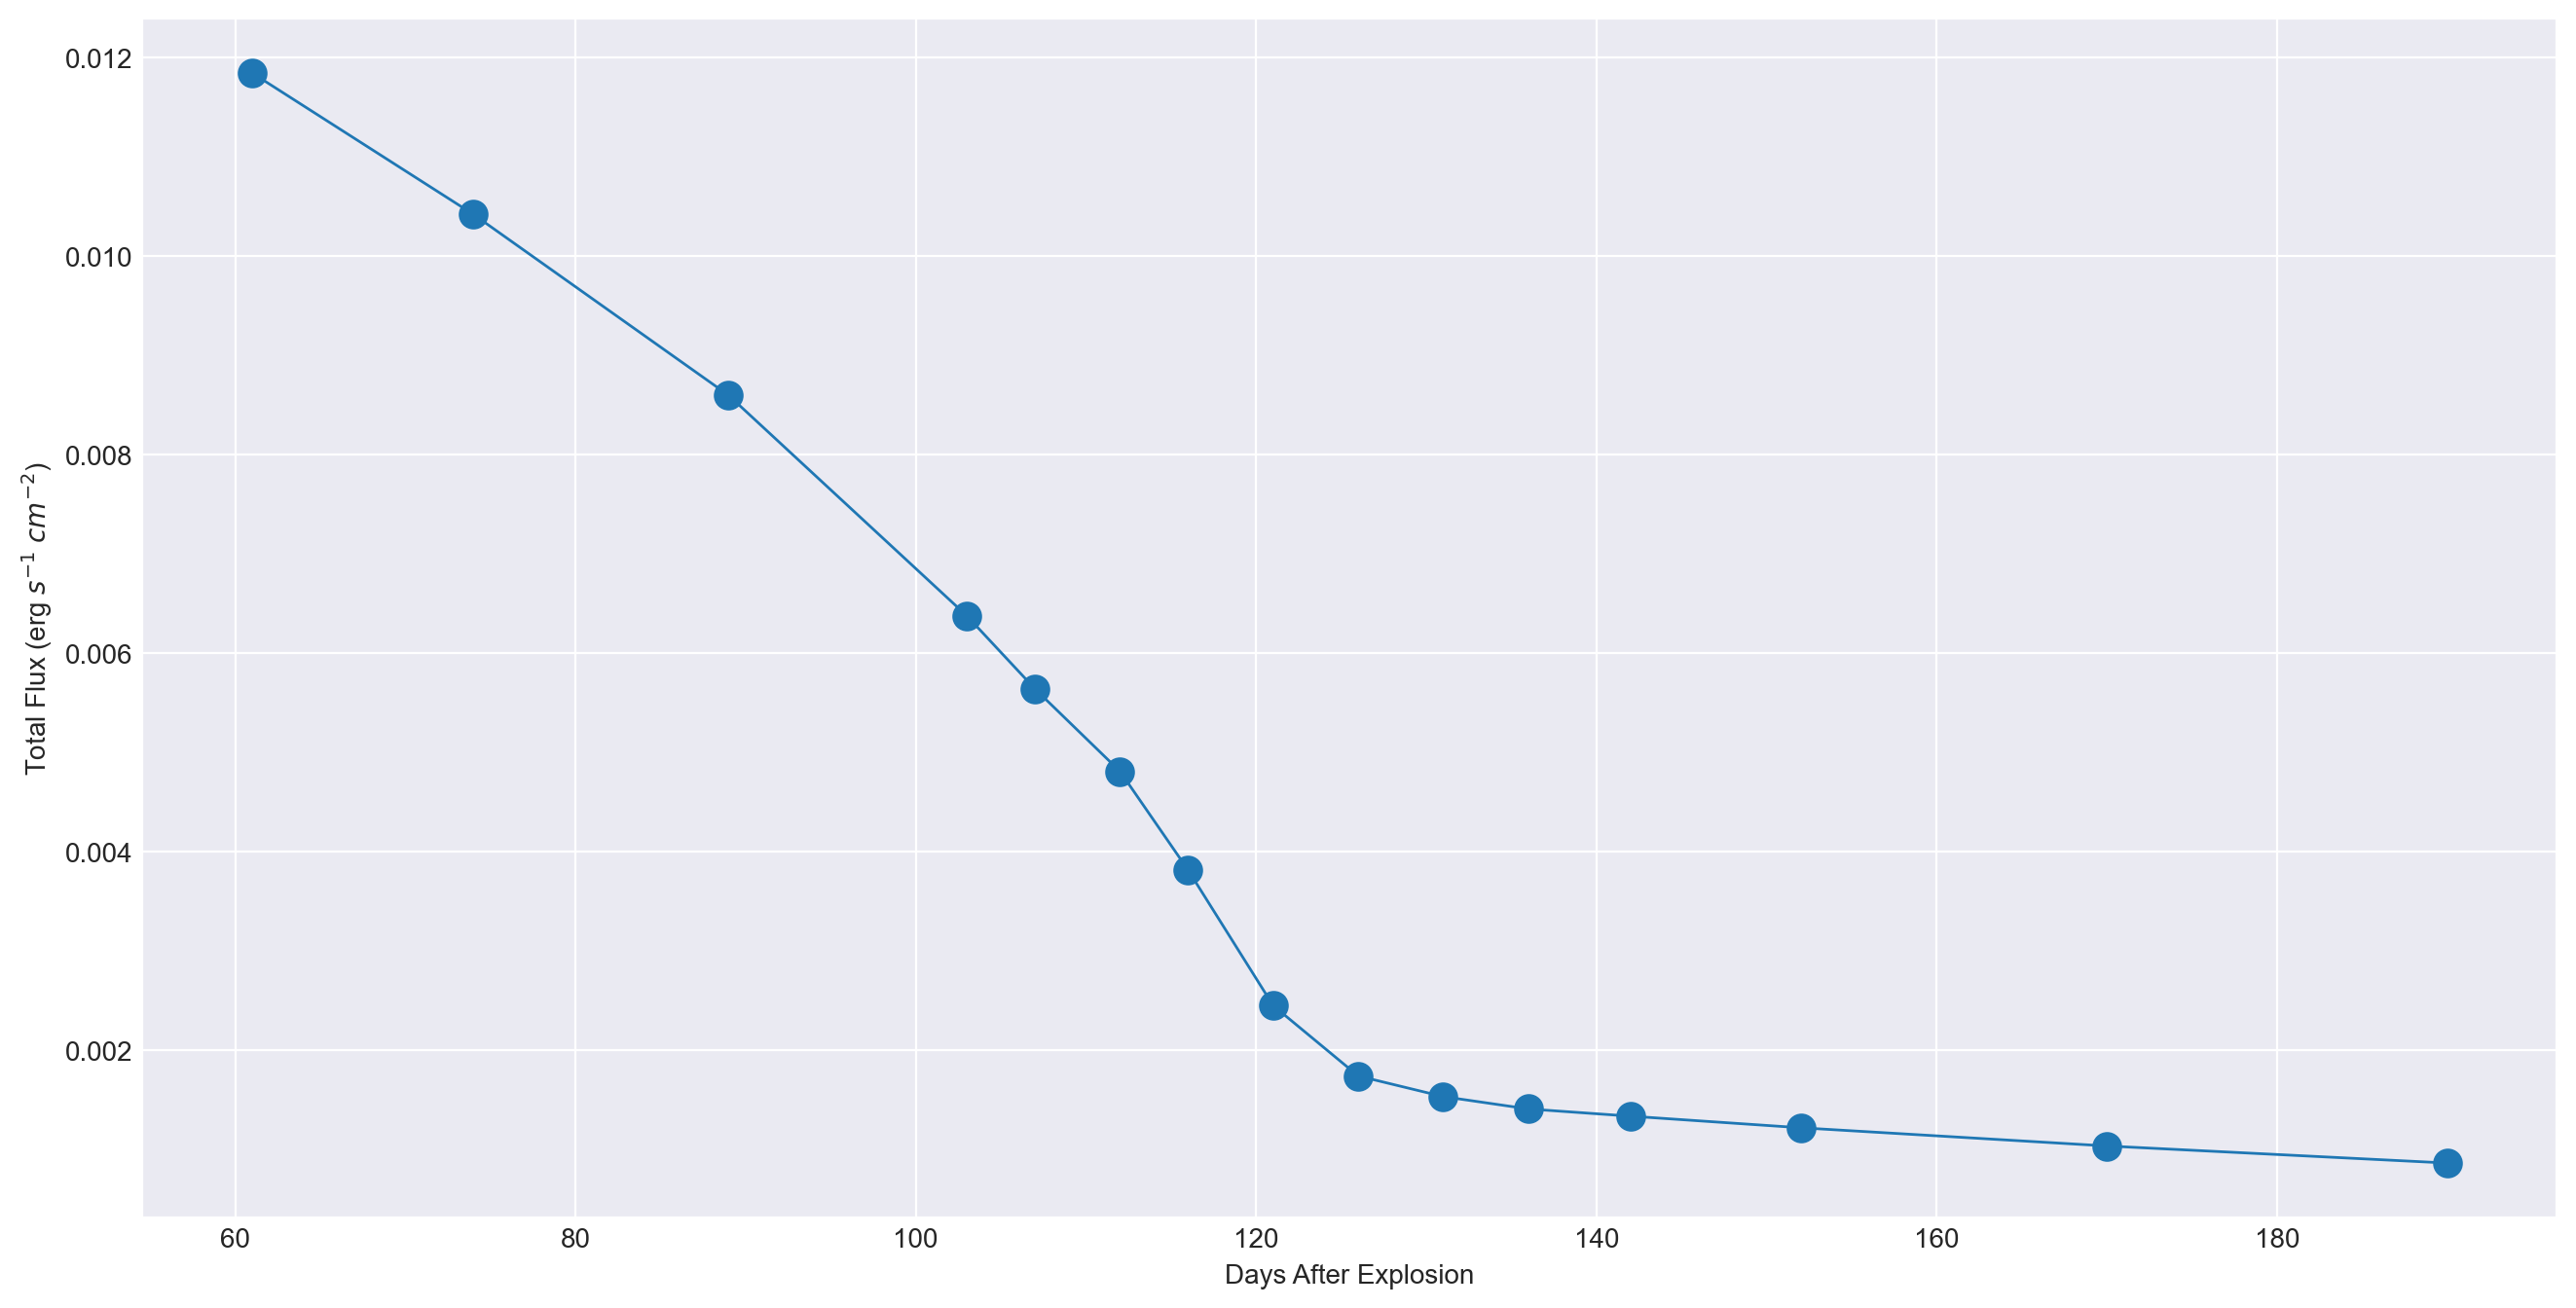

In [55]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(day_list, total_luminosities, marker='o', markersize=10)

ax.set_xlabel('Days After Explosion')
ax.set_ylabel(r'Total Flux (erg $s^{-1} \; cm^{-2}$)')

In [56]:
#Now calculate the integrated luminosity just in the co region, using our Boolean mask
#!Don't forget to mask the wavelength array as well!

# 
co_luminosities = np.trapz(reshaped_sn_data[:, 0, co_region], sn_wav[co_region], axis=1)
#

print(co_luminosities.shape)

(15,)


Text(0, 0.5, 'CO Band Fraction')

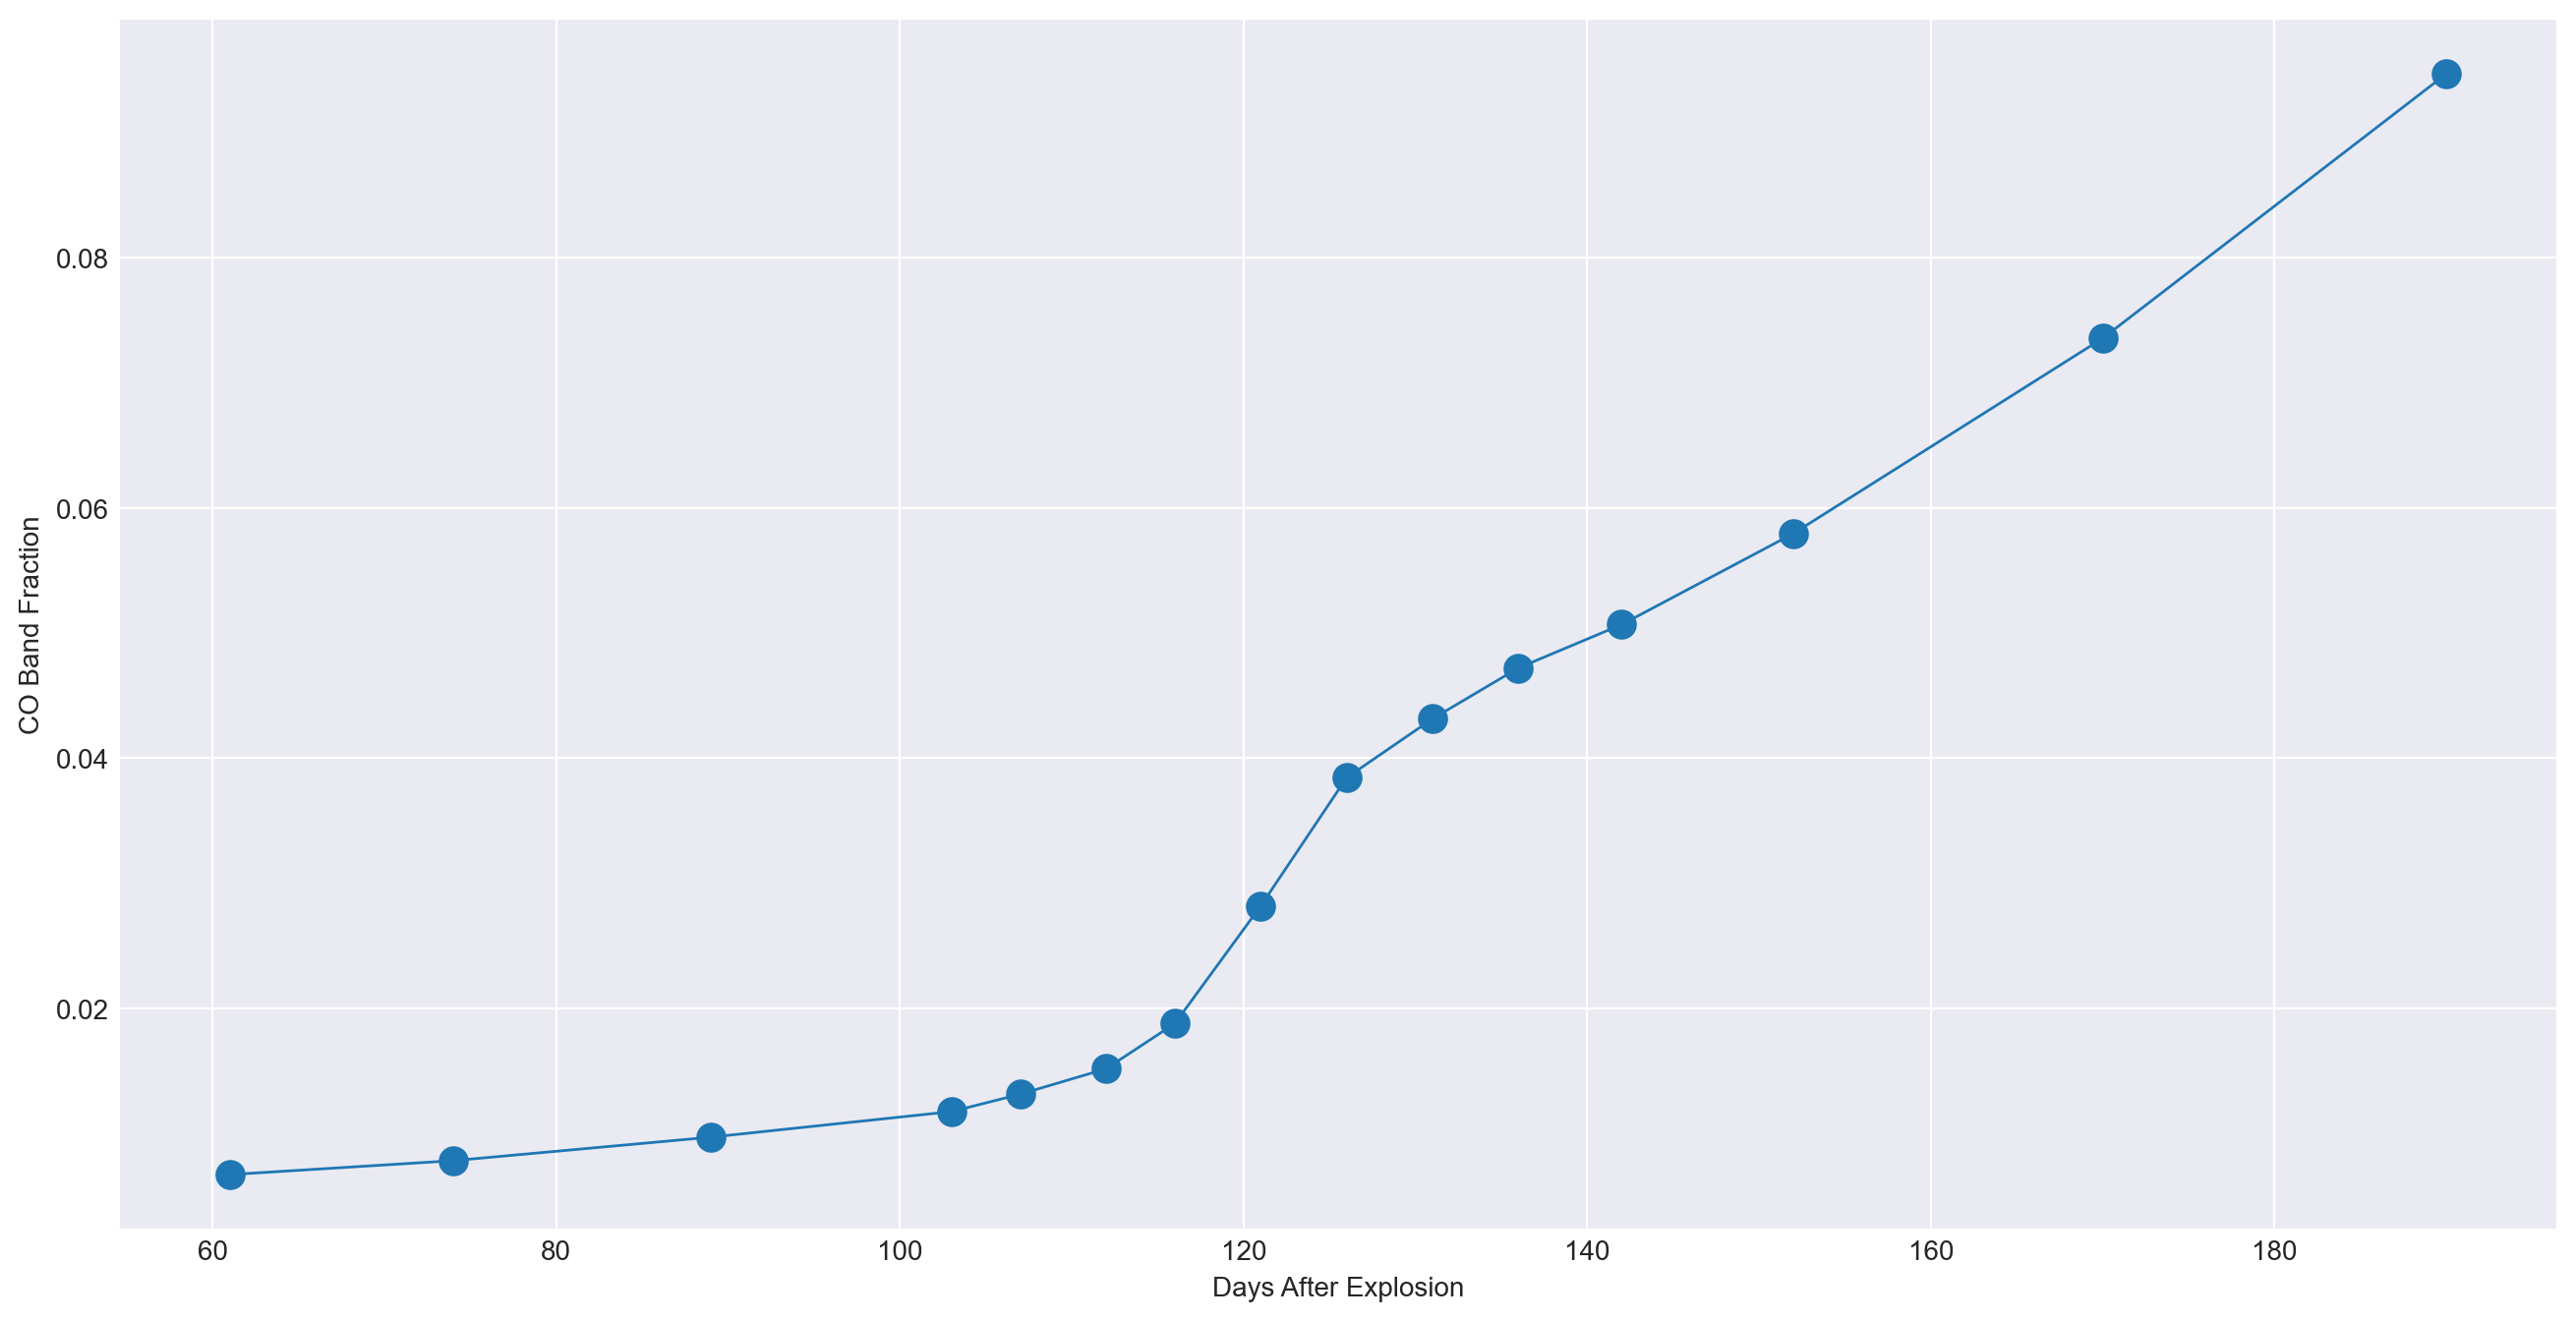

In [57]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(day_list, co_luminosities/total_luminosities, marker='o', markersize=10)

ax.set_xlabel('Days After Explosion')
ax.set_ylabel('CO Band Fraction')

The relative amount of emission from carbon monoxide increases significantly over time! 

This is because carbon monoxide takes time to form in the supernova.